# Web scraping for Collect Airlines Reviws to gain company insights

# Importing Necessary Libraries

In [1]:
# Import libraries for web scraping
import requests                         # For making HTTP requests to websites
from bs4 import BeautifulSoup           # For parsing HTML content
import pandas as pd                     # For data manipulation and storage
import numpy as np                      # For numerical operations (optional)
import re                               # For regular expressions (if needed for data extraction)
import time                             # For adding delays (to avoid overloading websites)
from tqdm import tqdm                   # For progress bars (optional but helpful)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Web Scraping:Skytrax

In [2]:
url = "https://www.airlinequality.com/airline-reviews/british-airways/"

In [3]:
# Send an HTTP GET request to the URL
response = requests.get(url)
response

<Response [200]>

In [4]:
# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # For instance, let's find and print the title of the webpage:
    page_title = soup.title.string
    print("Page Title:", page_title)
    
else:
    print('Failed to retrieve the webpage. Status code:', response.status_code)

Page Title: British Airways Customer Reviews - SKYTRAX


In [5]:
# Find and extract reviews listings on the webpage
text= soup.find_all("article", class_="comp comp_media-review-rated list-item media position-content review-871425")

In [6]:
text

[<article class="comp comp_media-review-rated list-item media position-content review-871425" itemprop="review" itemscope="" itemtype="http://schema.org/Review">
 <meta content="2023-09-06" itemprop="datePublished"/>
 <div class="rating-10" itemprop="reviewRating" itemscope="" itemtype="http://schema.org/Rating">
 <span itemprop="ratingValue">1</span>/<span itemprop="bestRating">10</span>
 </div>
 <div class="body" id="anchor871425">
 <h2 class="text_header">"Cannot recommend"</h2>
 <h3 class="text_sub_header userStatusWrapper">
 <span itemprop="author" itemscope="" itemtype="http://schema.org/Person">
 <span itemprop="name">E Durken</span></span> (Germany) <time datetime="2023-09-06" itemprop="datePublished">6th September 2023</time></h3>
 <div class="tc_mobile">
 <div class="text_content" itemprop="reviewBody">✅ <strong><a href="https://www.airlinequality.com/verified-reviews/"><em>Trip Verified</em></a></strong> |  4/4 flights we booked this holiday were delayed about 1-2 hours. No 

In [7]:
# Define the base URL for British Airways reviews
base_url = "https://www.airlinequality.com/airline-reviews/british-airways/page/{}"

# Initialize an empty list to store the scraped reviews
reviews = []

# Loop through 100 pages (adjust as needed)
for page in range(1,31):
    # Construct the URL for the current page
    url = base_url.format(page)
    
    # Send an HTTP GET request to the URL
    response = requests.get(url)
    
    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Extract the reviews from the page (adjust selectors as needed)
        review_elements = soup.select('h2',class_="text_header")  # Replace with the actual selector
        
        for review_element in review_elements:
            # Extract the text of the review
            review_text = review_element.text.strip()
            
            # Check if the review is not already in the list and is not an unwanted element
            if review_text not in reviews and not review_text.startswith(("Customer Reviews", "British Airways Photos", "Quick Links", "About",'FIRST CLASS','BUSINESS CLASS','PREMIUM ECONOMY','ECONOMY CLASS')):
                reviews.append(review_text)
    else:
        print(f"Failed to fetch page {page}. Status code: {response.status_code}")
        
        
        
print("Scraping Succesfully completed")

Scraping Succesfully completed


In [8]:
reviews

['"The worst service ever"',
 '"Cannot recommend"',
 '"BA is worse than a low cost carrier"',
 '"less than a premium experience"',
 '"good, but not spectacular"',
 '"Lies and misleading unprofessional service"',
 '"avoid BA like the plague"',
 '"British Airways absolutely does not care"',
 '"utter abdication of responsibility"',
 '"express our displeasure and concerns"',
 '"they are the worst in Europe"',
 '"customer service being so horrible"',
 '"appalling customer service"',
 '"standards are worse than ever"',
 '"still waiting for reimbursement"',
 '"unprofessional, uncaring"',
 '"Nice flight, good crew, very good seat"',
 '"Such a horrible experience"',
 '"Never again, BA"',
 '"ravioli pasta had dried out"',
 '"Great customer service"',
 '"Cabin crew were all fantastic"',
 '"asked us to check our bags"',
 '"service is extremely poor"',
 '"superior to mainline British Airways"',
 '"Staff quite unpleasant"',
 '"They lost my baggage"',
 '"leaving two hours late"',
 '"flight is delayed

# Create Dataframe

In [9]:
BA_Airlines = {"Reviews":reviews}

In [10]:
British_Airlines_reviews = pd.DataFrame(data=BA_Airlines)

In [11]:
British_Airlines_reviews

,Reviews
0,"""The worst service ever"""
1,"""Cannot recommend"""
2,"""BA is worse than a low cost carrier"""
3,"""less than a premium experience"""
4,"""good, but not spectacular"""
...,...
295,"""do not allow free seat selection"
296,"""Really not fair to just take our money!"""
297,"""Trying to call BA was a nightmare"""
298,"""flight was delayed over 6 hours"""


In [62]:
# Remove surrounding double quotes from the scraped text
cleaned_text = [text.strip('"') for text in reviews]

# Create a DataFrame with the cleaned text
British_Airlines_reviews = pd.DataFrame({'text': cleaned_text})

# Save Dataframe in data folder

In [63]:
file_path = r"C:\Users\bodak\data\BA_Reviews.csv"

In [64]:
British_Airlines_reviews.to_csv(file_path,index=False)

# Data Analysis

In [15]:
# Step 1: Import the necessary libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [16]:
# Step 2: Load the dataset
# Define the file path
file_path = r"C:\Users\bodak\data\BA_Reviews.csv"
# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

In [17]:
df

,Reviews
0,"""The worst service ever"""
1,"""Cannot recommend"""
2,"""BA is worse than a low cost carrier"""
3,"""less than a premium experience"""
4,"""good, but not spectacular"""
...,...
295,"""do not allow free seat selection"
296,"""Really not fair to just take our money!"""
297,"""Trying to call BA was a nightmare"""
298,"""flight was delayed over 6 hours"""


In [18]:
#show all rows

In [19]:
pd.set_option('display.max_rows',None)

In [20]:
df

,Reviews
0,"""The worst service ever"""
1,"""Cannot recommend"""
2,"""BA is worse than a low cost carrier"""
3,"""less than a premium experience"""
4,"""good, but not spectacular"""
5,"""Lies and misleading unprofessional service"""
6,"""avoid BA like the plague"""
7,"""British Airways absolutely does not care"""
8,"""utter abdication of responsibility"""
9,"""express our displeasure and concerns"""


In [21]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  300 non-null    object
dtypes: object(1)
memory usage: 2.5+ KB


In [22]:
df.isna().sum()

Reviews    0
dtype: int64

In [23]:
df.duplicated().sum()

0

In [24]:
# Step 3: Data Cleaning
# Clean the text data by removing special characters, numbers, and stopwords

In [30]:
# Data Cleaning
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

In [31]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['clean_text'] = df['Reviews'].apply(clean_text)

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [32]:
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [33]:
df

,Reviews,clean_text
0,"""The worst service ever""",worst service ever
1,"""Cannot recommend""",cannot recommend
2,"""BA is worse than a low cost carrier""",ba worse low cost carrier
3,"""less than a premium experience""",less premium experience
4,"""good, but not spectacular""",good spectacular
5,"""Lies and misleading unprofessional service""",lies misleading unprofessional service
6,"""avoid BA like the plague""",avoid ba like plague
7,"""British Airways absolutely does not care""",british airways absolutely care
8,"""utter abdication of responsibility""",utter abdication responsibility
9,"""express our displeasure and concerns""",express displeasure concerns


In [39]:
# pip install --upgrade spacy

In [42]:
import pandas as pd
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [43]:
# Tokenization and Lemmatization
def tokenize_and_lemmatize(text):
    tokens = nltk.word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

df['lemmatized_text'] = df['clean_text'].apply(tokenize_and_lemmatize)

In [44]:
df

,Reviews,clean_text,lemmatized_text
0,"""The worst service ever""",worst service ever,worst service ever
1,"""Cannot recommend""",cannot recommend,can not recommend
2,"""BA is worse than a low cost carrier""",ba worse low cost carrier,ba worse low cost carrier
3,"""less than a premium experience""",less premium experience,le premium experience
4,"""good, but not spectacular""",good spectacular,good spectacular
5,"""Lies and misleading unprofessional service""",lies misleading unprofessional service,lie misleading unprofessional service
6,"""avoid BA like the plague""",avoid ba like plague,avoid ba like plague
7,"""British Airways absolutely does not care""",british airways absolutely care,british airway absolutely care
8,"""utter abdication of responsibility""",utter abdication responsibility,utter abdication responsibility
9,"""express our displeasure and concerns""",express displeasure concerns,express displeasure concern


# Sentiment Analysis

 Perform sentiment analysis using TextBlob to get the sentiment polarity of each review.

In [46]:
# Function to get sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply the get_sentiment function to the 'clean_text' column
df['sentiment'] = df['clean_text'].apply(get_sentiment)

In [47]:
df

,Reviews,clean_text,lemmatized_text,sentiment
0,"""The worst service ever""",worst service ever,worst service ever,-1.000000
1,"""Cannot recommend""",cannot recommend,can not recommend,0.000000
2,"""BA is worse than a low cost carrier""",ba worse low cost carrier,ba worse low cost carrier,-0.200000
3,"""less than a premium experience""",less premium experience,le premium experience,-0.166667
4,"""good, but not spectacular""",good spectacular,good spectacular,0.650000
5,"""Lies and misleading unprofessional service""",lies misleading unprofessional service,lie misleading unprofessional service,0.000000
6,"""avoid BA like the plague""",avoid ba like plague,avoid ba like plague,0.000000
7,"""British Airways absolutely does not care""",british airways absolutely care,british airway absolutely care,0.100000
8,"""utter abdication of responsibility""",utter abdication responsibility,utter abdication responsibility,0.000000
9,"""express our displeasure and concerns""",express displeasure concerns,express displeasure concern,0.000000


# Word Cloud

Generate a word cloud to visualize the most common words in the reviews.

In [81]:
# Combine all reviews into a single string
all_reviews = ' '.join(df['clean_text'])
all_reviews

'worst service ever cannot recommend ba worse low cost carrier less premium experience good spectacular lies misleading unprofessional service avoid ba like plague british airways absolutely care utter abdication responsibility express displeasure concerns worst europe customer service horrible appalling customer service standards worse ever still waiting reimbursement unprofessional uncaring nice flight good crew good seat horrible experience never ba ravioli pasta dried great customer service cabin crew fantastic asked us check bags service extremely poor superior mainline british airways staff quite unpleasant lost baggage leaving two hours late flight delayed couldnt recommend ba bumped due overselling comfortable flight good onboard service really gone downhill lives past glory checkin desk rude dismissive terrible cancelled rebooked flight zero empathy shown pilot apologise every step way crew always ready top drinks service really mediocre made economy experience miserable custo

In [49]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

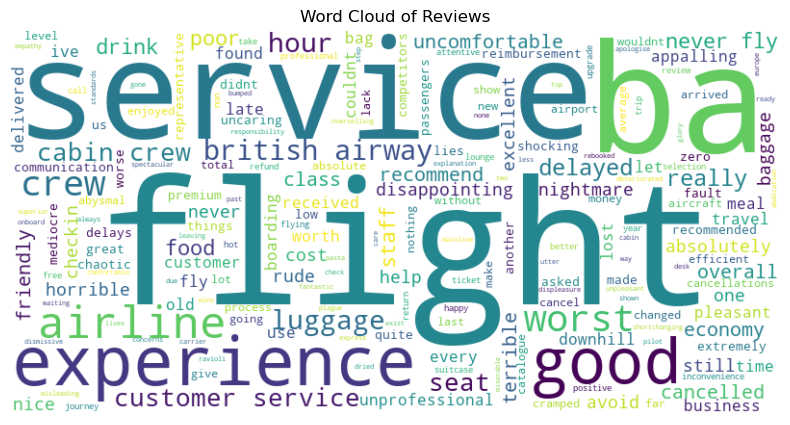

In [50]:
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

# Topic Modeling (Latent Dirichlet Allocation)

Perform topic modeling to uncover topics in the reviews.

In [51]:
# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['clean_text'])

# Perform Latent Dirichlet Allocation (LDA)
num_topics = 5  # You can adjust the number of topics
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(dtm)

# Display the top words for each topic
for index, topic in enumerate(lda.components_):
    print(f"Topic {index + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print()

Topic 1:
['horrible', 'class', 'economy', 'terrible', 'staff', 'customer', 'service', 'worst', 'experience', 'airline']

Topic 2:
['checkin', 'delivered', 'baggage', 'hour', 'boarding', 'nightmare', 'food', 'cancelled', 'flight', 'poor']

Topic 3:
['overall', 'nice', 'flights', 'experience', 'seat', 'delayed', 'cabin', 'crew', 'good', 'flight']

Topic 4:
['shocking', 'wouldnt', 'meal', 'hours', 'recommend', 'worth', 'airways', 'fly', 'british', 'service']

Topic 5:
['like', 'late', 'downhill', 'drinks', 'avoid', 'friendly', 'really', 'luggage', 'crew', 'ba']



# Explore Descriptive Statistics

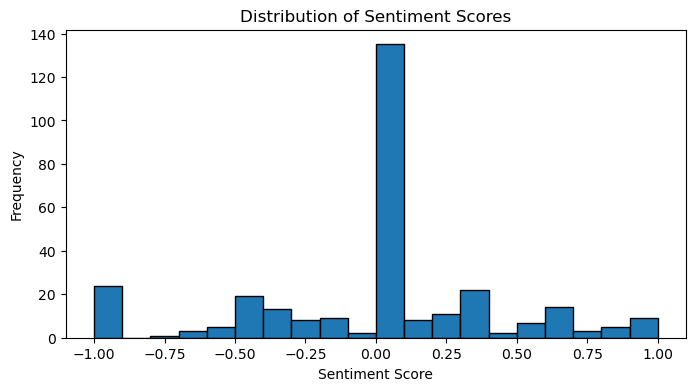

In [52]:
# Distribution of sentiment scores
plt.figure(figsize=(8, 4))
plt.hist(df['sentiment'], bins=20, edgecolor='k')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

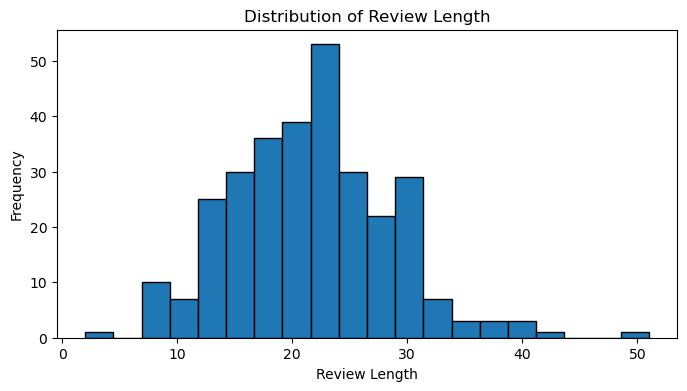

In [53]:
# Review length analysis
df['review_length'] = df['clean_text'].apply(len)
plt.figure(figsize=(8, 4))
plt.hist(df['review_length'], bins=20, edgecolor='k')
plt.title('Distribution of Review Length')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

# Clustering Analysis

1    213
3     28
0     22
4     19
2     18
Name: cluster, dtype: int64


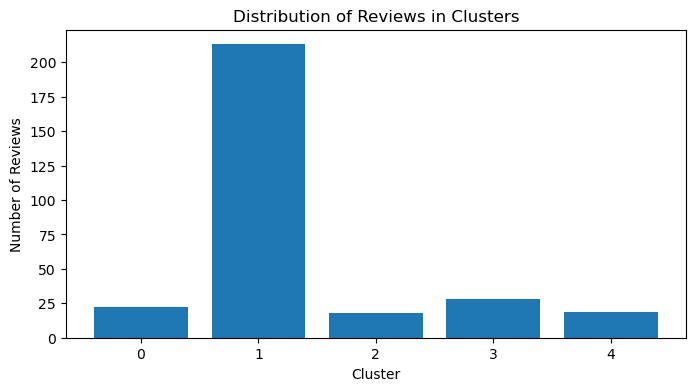

In [60]:
from sklearn.cluster import KMeans

# Vectorize the text data using TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_dtm = tfidf_vectorizer.fit_transform(df['clean_text'])

# Perform K-means clustering
num_clusters = 5  # You can adjust the number of clusters
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
kmeans.fit(tfidf_dtm)

# Add cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

# Analyze the distribution of reviews in each cluster
cluster_distribution = df['cluster'].value_counts()
print(cluster_distribution)

# Visualize the distribution of reviews in each cluster
plt.figure(figsize=(8, 4))
plt.bar(cluster_distribution.index, cluster_distribution.values)
plt.title('Distribution of Reviews in Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Reviews')
plt.show()

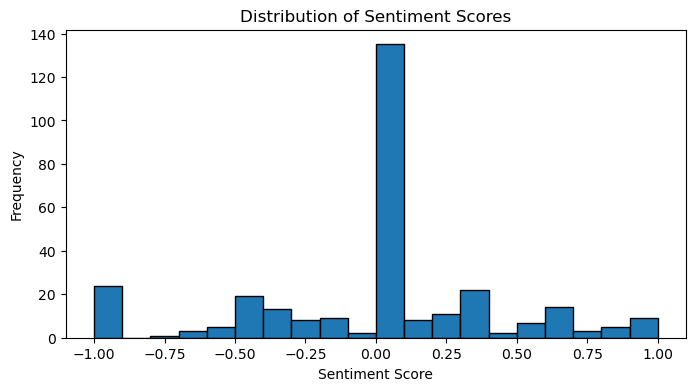

In [65]:
# Distribution of sentiment scores
plt.figure(figsize=(8, 4))
plt.hist(df['sentiment'], bins=20, edgecolor='k')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Word Cloud for Positive and Negative Sentiments:

In [68]:
# Separate positive and negative sentiment reviews
positive_reviews = df[df['sentiment'] > 0]['clean_text']
negative_reviews = df[df['sentiment'] < 0]['clean_text']

In [69]:
# Generate word clouds for positive and negative reviews
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_reviews))
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_reviews))

(-0.5, 799.5, 399.5, -0.5)

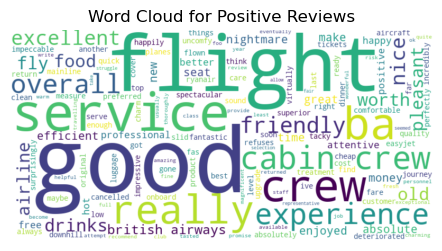

In [70]:
# Display the word clouds side by side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')

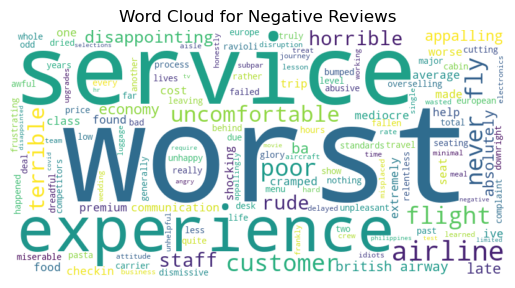

In [84]:
plt.subplot(1,1,1)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')

plt.show()

# Bar Chart for Top Positive and Negative Words:

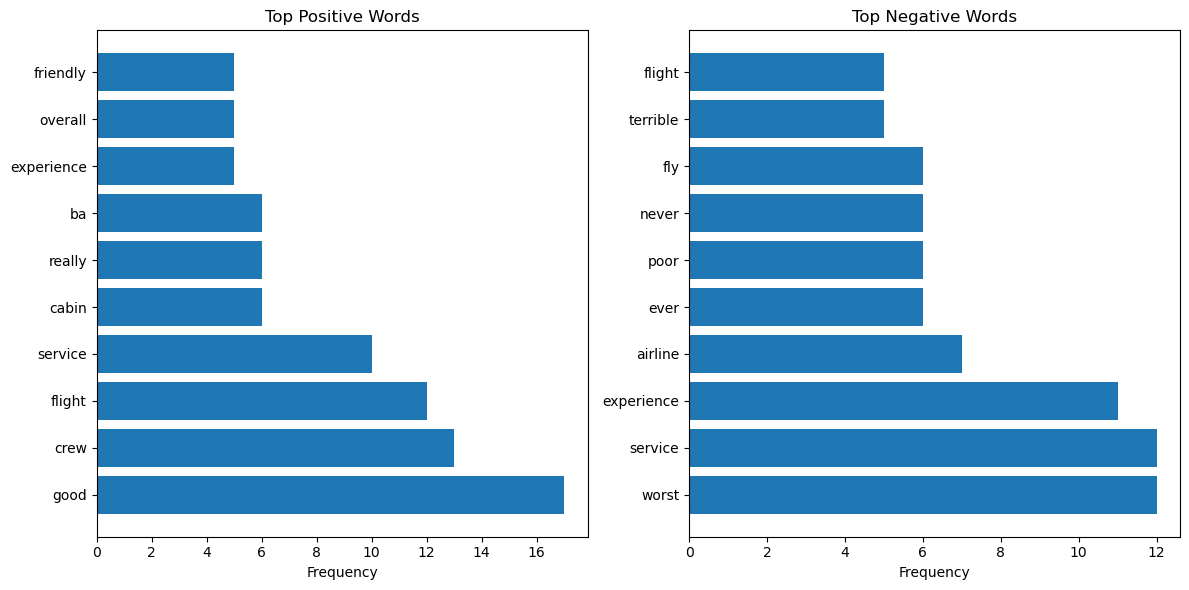

In [72]:
from collections import Counter

# Count the frequency of words in positive and negative reviews
positive_word_counts = Counter(' '.join(positive_reviews).split())
negative_word_counts = Counter(' '.join(negative_reviews).split())

# Get the top N words for each sentiment
top_n = 10
top_positive_words = [word[0] for word in positive_word_counts.most_common(top_n)]
top_negative_words = [word[0] for word in negative_word_counts.most_common(top_n)]

# Create bar charts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(top_positive_words, [positive_word_counts[word] for word in top_positive_words])
plt.title('Top Positive Words')
plt.xlabel('Frequency')

plt.subplot(1, 2, 2)
plt.barh(top_negative_words, [negative_word_counts[word] for word in top_negative_words])
plt.title('Top Negative Words')
plt.xlabel('Frequency')

plt.tight_layout()
plt.show()

# Sentiment Pie Chart:

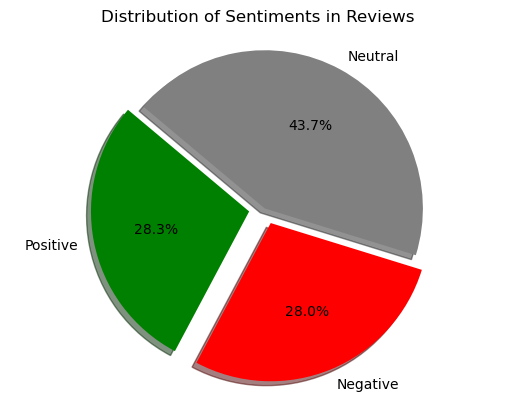

In [74]:
# Count the number of positive, negative, and neutral reviews
num_positive_reviews = len(df[df['sentiment'] > 0])
num_negative_reviews = len(df[df['sentiment'] < 0])
num_neutral_reviews = len(df[df['sentiment'] == 0])

# Create a pie chart
labels = ['Positive', 'Negative', 'Neutral']
sizes = [num_positive_reviews, num_negative_reviews, num_neutral_reviews]
colors = ['green', 'red', 'gray']
explode = (0.1, 0.1, 0)  # Explode the positive and negative segments
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Distribution of Sentiments in Reviews')
plt.show()

# Comparison of Sentiment by Review Length:

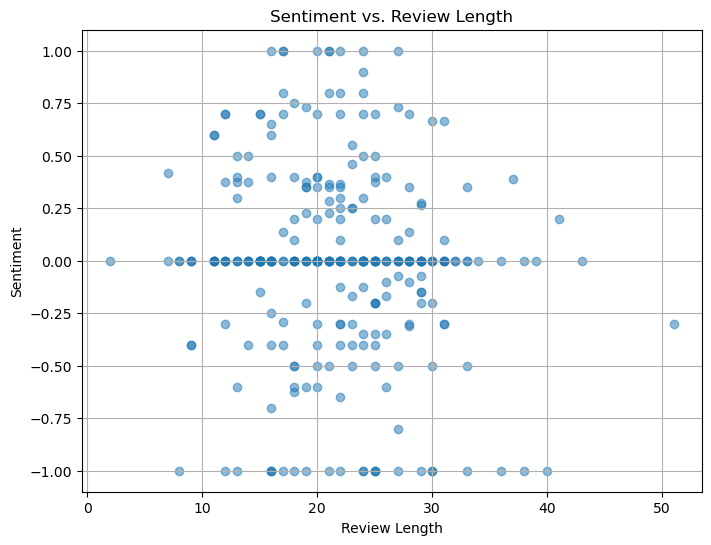

In [76]:
# Create a scatter plot of sentiment vs. review length
plt.figure(figsize=(8, 6))
plt.scatter(df['review_length'], df['sentiment'], alpha=0.5)
plt.title('Sentiment vs. Review Length')
plt.xlabel('Review Length')
plt.ylabel('Sentiment')
plt.grid(True)
plt.show()